# Notebook 17 - SciPy and SymPy


We have already seen in multiple notebooks that SciPy contains many useful tools for scientists and engineers. We also saw in the ODE notebook one good example of using SymPy for symbolic computing.

In this notebook we will further explore these tools.


## SciPy

SciPy is a library of python modules for scientific computing

https://docs.scipy.org/doc/

Some of the things it contains include:
* Scientific constants
* Conversion factors
* Functions
* Integration
* Fourier transforms
* Interpolation
* Signal processing
* Linear Algebra
* Statistics tools
* Image processing



### SciPy Constants and Conversion Factors

One really useful thing about SciPy is the large library of included constants. For example:

In [1]:
import scipy.constants

print("The value of pi is = ",scipy.constants.pi)
print("The speed of light is = ",scipy.constants.c)
print("The elementry charge is = ",scipy.constants.e)
print("Avogadro's number is = ",scipy.constants.Avogadro)


The value of pi is =  3.141592653589793
The speed of light is =  299792458.0
The elementry charge is =  1.602176634e-19
Avogadro's number is =  6.02214076e+23


SciPy also includes many useful conversion factors:

In [2]:
print("One horsepower is equivalent to",scipy.constants.horsepower, "Watts")
print("One calorie is equivalent to",scipy.constants.calorie, "Joules")
print("One mph is equivalent to",scipy.constants.mph, "m/s")
print("The speed of sound is",scipy.constants.speed_of_sound, "m/s")
print("The speed of sound is",scipy.constants.speed_of_sound/scipy.constants.mph, "miles per hour")

One horsepower is equivalent to 745.6998715822701 Watts
One calorie is equivalent to 4.184 Joules
One mph is equivalent to 0.44703999999999994 m/s
The speed of sound is 340.5 m/s
The speed of sound is 761.6768074445241 miles per hour


There are a huge number of constants:

https://docs.scipy.org/doc/scipy/reference/constants.html

There are also some conversion functions:


In [3]:
scipy.constants.convert_temperature(30, 'Celsius', 'Kelvin')

303.15

You can even convert an entire array of temperatures:

In [4]:
import numpy as np
scipy.constants.convert_temperature(np.array([0, 32.0, 60]), 'Fahrenheit', 'Celsius')

array([-17.77777778,   0.        ,  15.55555556])

The physical constants included in SciPy also include units and the uncertainty on that constant. For example, we can return a python tuple which returns:

(value of constant, unit, uncertainty)

In [5]:
scipy.constants.physical_constants['Newtonian constant of gravitation']

(6.6743e-11, 'm^3 kg^-1 s^-2', 1.5e-15)

In [6]:
G = scipy.constants.physical_constants['Newtonian constant of gravitation']
print("Value ",G[0])
print("Unit ",G[1])
print("Uncertainty ",G[2])

Value  6.6743e-11
Unit  m^3 kg^-1 s^-2
Uncertainty  1.5e-15


Since there is a huge list of constants, you can find the one you are looking for by using the find() function. For example, if you wanted to know some properties of the electron you could do:

In [7]:
scipy.constants.find("electron")

['alpha particle-electron mass ratio',
 'atomic mass unit-electron volt relationship',
 'classical electron radius',
 'deuteron-electron mag. mom. ratio',
 'deuteron-electron mass ratio',
 'electron charge to mass quotient',
 'electron g factor',
 'electron gyromag. ratio',
 'electron gyromag. ratio in MHz/T',
 'electron mag. mom.',
 'electron mag. mom. anomaly',
 'electron mag. mom. to Bohr magneton ratio',
 'electron mag. mom. to nuclear magneton ratio',
 'electron mass',
 'electron mass energy equivalent',
 'electron mass energy equivalent in MeV',
 'electron mass in u',
 'electron molar mass',
 'electron relative atomic mass',
 'electron to alpha particle mass ratio',
 'electron to shielded helion mag. mom. ratio',
 'electron to shielded proton mag. mom. ratio',
 'electron volt',
 'electron volt-atomic mass unit relationship',
 'electron volt-hartree relationship',
 'electron volt-hertz relationship',
 'electron volt-inverse meter relationship',
 'electron volt-joule relationship',

And now we can find out the electron mass, unit, and the error on that value

In [8]:
m_e = scipy.constants.physical_constants['electron mass']
print("Mass of electron ",m_e[0])
print("Unit ",m_e[1])
print("Uncertainty",m_e[2])

Mass of electron  9.1093837015e-31
Unit  kg
Uncertainty 2.8e-40


We can use SciPy to convert the electron mass to Mega Electron Volts (MeV/c^2)



In [92]:
# Get eV/c^2 <-> kg conversion factor
one_electron_volt_in_kg = scipy.constants.physical_constants['electron volt-kilogram relationship']
print("1 eV/c^2 = ",one_electron_volt_in_kg[0],"kg")

# Convert mass of electron to eV/c^2
m_e_eV = m_e[0]/one_electron_volt_in_kg[0]
print("Mass of electron in eV/c^2 =",m_e_eV)

# Convert to MeV
m_e_MeV = m_e_eV/scipy.constants.mega
print("Mass of electron in MeV/c^2 =",m_e_MeV)


1 eV/c^2 =  1.782661921e-36 kg
Mass of electron in eV/c^2 = 510998.9501761507
Mass of electron in MeV/c^2 = 0.5109989501761507


### SciPy Integration

You can integrate functions using the quad() function in SciPy.

In [9]:
from scipy.integrate import quad
import numpy as np

def f(x):
    return np.cos(x)

# integrate the function from 0 to pi/2
I = quad(f, 0, np.pi/2)
print(I)

(0.9999999999999999, 1.1102230246251564e-14)


Note that quad returns a tuple containing both the result of the numerical integral and and the unceratinty on that value:

In [10]:
print("The integral of cos from 0 to pi/2 is ",I[0])
print("The uncertainty on this value is ", I[1])

The integral of cos from 0 to pi/2 is  0.9999999999999999
The uncertainty on this value is  1.1102230246251564e-14


### SciPy Solving Ordinar Differential Equations

For reference I included the odeint function that we had learned previously:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)

Here func is the function, y0 is the initial value, and t is the time array over which you would like to solve, and args is a tuple containing the value of constants.

We had previously used this to solve some ODEs:

delta_t 3.75


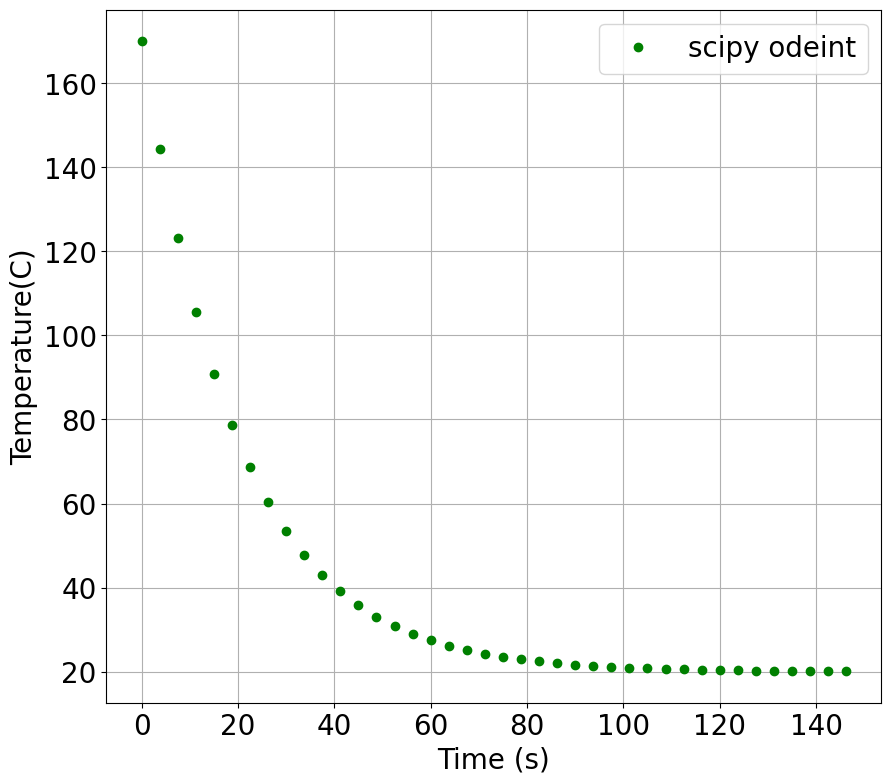

In [11]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
############
# Define and solve the diffEQ

def f(T,t,k,T_env):
    myf = -k * ( T - T_env )
    return myf

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Set time range (minutes)
a = 0.0
b = 150.0

# Set number of time divisions and step size delta_t
N = 40
delta_t = (b-a)/N
print("delta_t",delta_t)

# Array of time
tpoints  = np.arange(a,b,delta_t)

# Solve
soln = odeint(f, T_0, tpoints, args=(k, T_env)) # returns an array of arrays, each containing the values for each function (in this case we only have the temperature function)
Tpoints_odeint = soln[:, 0]
#print(Tpoints_odeint)

############
# Make plots

plt.figure(figsize=(10,9))
plt.plot(tpoints,Tpoints_odeint, "go" , label="scipy odeint")
plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.show()


### SciPy example datasets

SciPy contains some easy to access datasets that you can play with:

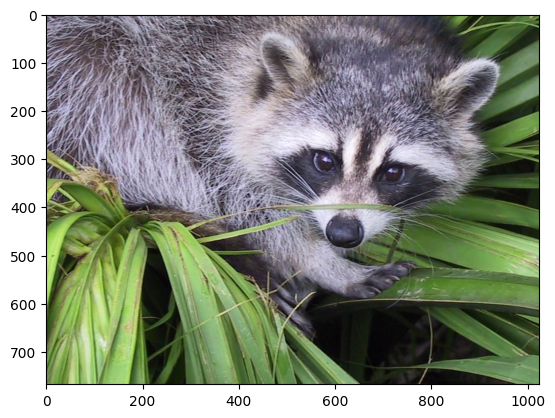

In [104]:
import scipy.datasets
import matplotlib.pyplot as plt

face = scipy.datasets.face()
plt.figure()
plt.imshow(face)
plt.show()

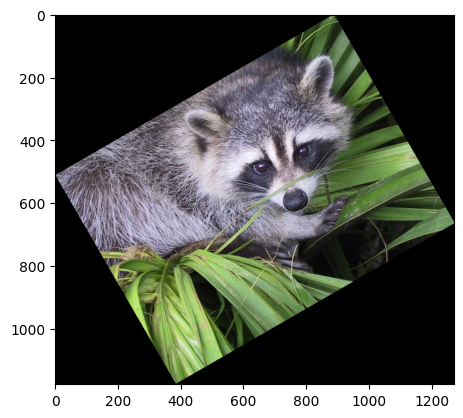

In [105]:
from scipy import ndimage
rotate_face = ndimage.rotate(face, 30)
plt.figure()
plt.imshow(rotate_face)
plt.show()

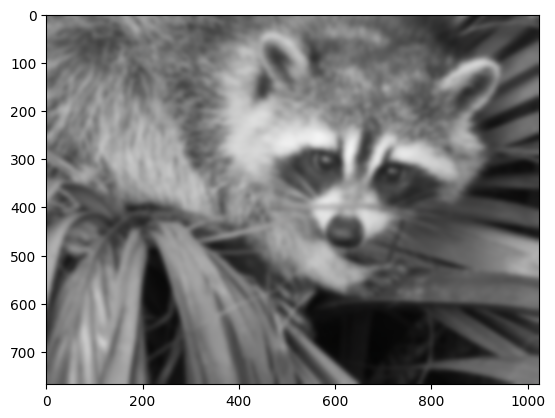

In [108]:
blurred = ndimage.gaussian_filter(face, sigma=5)
plt.figure()
plt.imshow(blurred)
plt.show()

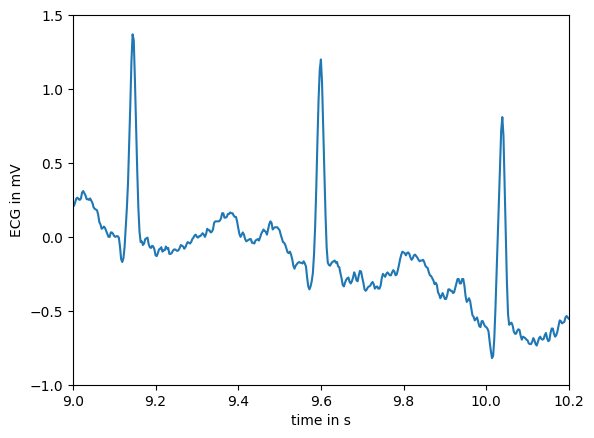

In [110]:
from scipy.datasets import electrocardiogram
ecg = electrocardiogram()
import numpy as np
import matplotlib.pyplot as plt

fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

### Minimize a funciton with SciPy

In [137]:
def f(x):
    return 800/x+x**2

<ipython-input-137-06c80e679765>:2: RuntimeWarning: divide by zero encountered in divide
  return 800/x+x**2


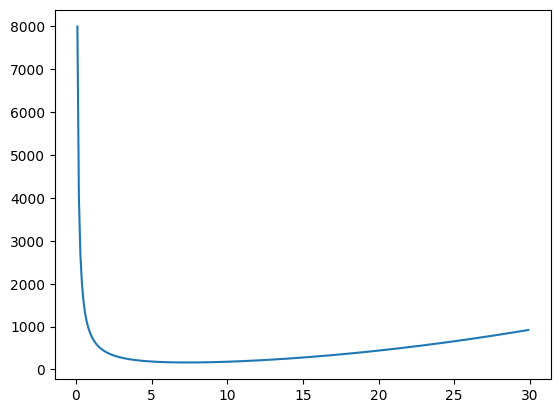

In [141]:
x=np.arange(0,30,0.1)
plt.plot(x,f(x))

In [145]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f, bounds=(0.5, 25), method='bounded')

print("x position of minimum",res.x)
print("y value of minimum",res.fun)


x position of minimum 7.3680630869315396
y value of minimum 162.86505699569443


## SymPy

SymPy allows one to do symbolic computing in python

In [12]:
import sympy as sy
sy.init_printing() # display better looking symbols in Jupyter notebooks
import numpy as np
import matplotlib.pyplot as plt

SymPy provides "pretty", easy to read symbols in Jupyter notebooks

In [13]:
#associate a symbol with a python variable
x = sy.Symbol("x")

# Display the square root of x^2 in a nice way:
sy.sqrt(x**2)

   ____
  ╱  2 
╲╱  x  

SymPy will automatically simplify expressions. If we take the previous example and we tell SymPy that x is positive it will simplify the sqrt(x^2) to x:

In [14]:
x = sy.Symbol("x",positive=True) #associate a symbol with a python variable

sy.sqrt(x**2)

x

One can also declare multiple symbols at once (Use symbols() instead of Symbol() ):

In [15]:
a,b,c= sy.symbols("a,b,c")

Given a complicated expression, Sympy will display it nicely

In [16]:
expr = 2*(x**2-x)-x*(x+1)+x+3*x*(x+5)
expr

   2                              
2⋅x  - x⋅(x + 1) + 3⋅x⋅(x + 5) - x

SymPy can also simplify expressions further using the simplify() function

In [17]:
sy.simplify(expr)

x⋅(4⋅x + 13)

It can even simplify using trig identities:

In [18]:
f1 = 2*sy.cos(x)*sy.sin(x)
f1

2⋅sin(x)⋅cos(x)

In [19]:
sy.simplify(f1)

sin(2⋅x)

This is great! We don't need to look up the trig identity $\sin(2x) = 2 \sin(x)\cos(x)$

 It can also simplify power expressions:

In [20]:
x = sy.Symbol("x")
y = sy.Symbol("y")
f2 = sy.exp(x) * sy.exp(y)
f2

 x  y
ℯ ⋅ℯ 

In [21]:
sy.simplify(f2)

 x + y
ℯ     

You can control the type of simplification with other commands:

In [22]:
f3 = sy.exp(x) * sy.exp(2*sy.cos(y)*sy.sin(y))
f3

 x  2⋅sin(y)⋅cos(y)
ℯ ⋅ℯ               

For example we can simplify the trig but not the power:

In [23]:
sy.trigsimp(f3)

 x  sin(2⋅y)
ℯ ⋅ℯ        

Or we can simplfiy the power but not the trig:

In [24]:
sy.powsimp(f3)

 x + 2⋅sin(y)⋅cos(y)
ℯ                   

In [25]:
sy.simplify(f3)

 x + sin(2⋅y)
ℯ            

Other commands are available which allow you to expand() an expression:

In [26]:
f = (x+1)*(x+2)
f

(x + 1)⋅(x + 2)

In [27]:
sy.simplify(f)

(x + 1)⋅(x + 2)

In [28]:
sy.expand(f)

 2          
x  + 3⋅x + 2

You need to specify if you would like to expand trig or log expressions

In [29]:
f=sy.sin(x+y)
sy.expand(f)

sin(x + y)

In [30]:
sy.expand(f,trig=True)

sin(x)⋅cos(y) + sin(y)⋅cos(x)

In [31]:
a, b = sy.symbols("a,b",positive=True)
f = sy.log(a*b)
f

log(a⋅b)

In [32]:
sy.expand(f,log=True)

log(a) + log(b)

In [33]:
f=(a*b)**x
sy.expand(f,power_base=True)

 x  x
a ⋅b 

You can also factor an expresion with factor()

In [34]:
f=x**2-1
sy.expand(f)

 2    
x  - 1

In [35]:
sy.factor(x**2-1)

(x - 1)⋅(x + 1)

You can also simplify log expressions using logcombine()

In [36]:
f=sy.log(a)-sy.log(b)
sy.logcombine(f)

   ⎛a⎞
log⎜─⎟
   ⎝b⎠

You can also collect common powers using collect()

In [37]:
f = x + y + x*y*y
f

   2        
x⋅y  + x + y

In [38]:
f.collect(x)

  ⎛ 2    ⎞    
x⋅⎝y  + 1⎠ + y

### Using SymPy to solve equations or systems of equations

sy.solve() can be used to find the roots of an equation

In [39]:
x = sy.Symbol("x")
f=x**2+2*x-3
f

 2          
x  + 2⋅x - 3

If we want to know what values of $x$ satisfy $x^2+2x-3 =0$ we can use solve() :

In [40]:
sy.solve(f)

[-3, 1]

sy.solve() can also find the roots with symbols. For example we can prove the quadratic equation:

In [41]:
a,b,c= sy.symbols("a,b,c")
f = a*x**2 + b*x + c
sy.solve(f,x)

⎡        _____________          _____________⎤
⎢       ╱           2          ╱           2 ⎥
⎢-b - ╲╱  -4⋅a⋅c + b    -b + ╲╱  -4⋅a⋅c + b  ⎥
⎢─────────────────────, ─────────────────────⎥
⎣         2⋅a                    2⋅a         ⎦

We can also find the roots of a polynomial of degree 3 (this is a bit ugly but we can do it!)

In [42]:
a,b,c,d= sy.symbols("a,b,c,d")
f = a*x**3 + b*x*x + c*x + d
sy.solve(f,x)

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                 2                           
⎢                                          3⋅c   b                            
⎢                                        - ─── + ──                           
⎢                                           a     2                           
⎢                                                a                            
⎢- ───────────────────────────────────────────────────────────────────────────
⎢               ____________________________________

We can find the roots of a trig function. For example sin(x) is equal to 0 if x is equal to 0 or pi:

In [43]:
f=sy.sin(x)
sy.solve(f)

[0, π]

In [44]:
f=sy.cos(x)
sy.solve(f)

⎡π  3⋅π⎤
⎢─, ───⎥
⎣2   2 ⎦

In [45]:
f=sy.cos(x)-1
sy.solve(f)

[0, 2⋅π]

In some cases SymPy will fail to find an algebraic solution:

In [46]:
#no algebraic solution
f=x**5-x**2+1
sy.solve(f)

⎡       ⎛ 5    2       ⎞         ⎛ 5    2       ⎞         ⎛ 5    2       ⎞    
⎣CRootOf⎝x  - x  + 1, 0⎠, CRootOf⎝x  - x  + 1, 1⎠, CRootOf⎝x  - x  + 1, 2⎠, CR

     ⎛ 5    2       ⎞         ⎛ 5    2       ⎞⎤
ootOf⎝x  - x  + 1, 3⎠, CRootOf⎝x  - x  + 1, 4⎠⎦

In a previous notebook we used the relaxation method to solve the equation

$x = 2 - e^{-x}$

If we try to solve it with SymPy it does not return an answer but rather it returns a named function (the LambertW equation):

In [47]:
f= 2 - sy.exp(-x) -x
sy.solve(f)

⎡ ⎛  -2⎞       ⎛  -2    ⎞    ⎤
⎣W⎝-ℯ  ⎠ + 2, W⎝-ℯ  , -1⎠ + 2⎦

Since SymPy cannot solve this function exactly, it can solve it numerically using some of the methods we discussed previously. To do this use the nsolve() function "numerical solve"

In [48]:
sy.nsolve(f, 5) # number is your initial "guess"

1.84140566043696

This is the same answer we found in the "Solving Nonlinear Equations and Finding Roots" notebook!

#### Linear Algebra

Solve, as discussed above, can also solve systems of equations

In [49]:
x,y= sy.symbols("x,y")
f1 = 3*x + 4*y - 5
f2 = -7*x + 2*y - 9
sy.solve([f1,f2],[x,y])

⎧   -13      31⎫
⎨x: ────, y: ──⎬
⎩    17      17⎭

SymPy also allows you to view matrices and provides powerful linear algebra tools

In [50]:
a,b,c,d= sy.symbols("a,b,c,d")
M = sy.Matrix([[a,b],[c,d]])
M

⎡a  b⎤
⎢    ⎥
⎣c  d⎦

In [51]:
M*M

⎡ 2                  ⎤
⎢a  + b⋅c   a⋅b + b⋅d⎥
⎢                    ⎥
⎢                  2 ⎥
⎣a⋅c + c⋅d  b⋅c + d  ⎦

#### Evaluating Expressions with SymPy

The function N() allows you to evaluate expressions.

http://docs.sympy.org/latest/modules/core.html#n

For example:

sy.N(x, n=15) evaluates expression x with precision n

In [52]:
sy.N(sy.pi, 4)

3.142

In [53]:
sy.N(sy.pi, 50)

3.1415926535897932384626433832795028841971693993751

SymPy allows you to symbolically write down a sum and then evaluate it with N():

In [54]:
x = sy.Symbol("x")
mysum = sy.Sum(x**2, (x,1,3))
mysum

  3     
 ___    
 ╲      
  ╲    2
  ╱   x 
 ╱      
 ‾‾‾    
x = 1   

In [55]:
sy.N(mysum)

14.0000000000000

In [56]:
x = sy.Symbol("x")
mysum = sy.Sum(x**2, (x,1,100))
mysum

 100    
 ___    
 ╲      
  ╲    2
  ╱   x 
 ╱      
 ‾‾‾    
x = 1   

In [57]:
sy.N(mysum)

338350.000000000

You can even evaluate an infinite sum! To do this use sy.oo (two "o"s)

In [58]:
alternating_series = sy.Sum((-1)**x/(2*x-1), (x,1,sy.oo))
alternating_series

  ∞          
 ____        
 ╲           
  ╲        x 
   ╲   (-1)  
   ╱  ───────
  ╱   2⋅x - 1
 ╱           
 ‾‾‾‾        
x = 1        

In [59]:
sy.N(alternating_series)

-0.785398163397448

Sympy can even express the result of a convergent series symbolicly using sympy.doit()

In [60]:
alternating_series.doit()

-π 
───
 4 

If you wish to define a symbolic function and then evaluate it at a certain point, you can do this evaluation using subs() [ for substitute]

In [61]:
fx = x**3
fx

 3
x 

In [62]:
fx.subs(x,4)

64

#### Derivatives in SymPy
http://docs.sympy.org/latest/tutorial/calculus.html

We can use the diff(fx, x) function to evaluate function fx with respect to x sybolically:

In [63]:
x, y = sy.symbols('x y')
fx = sy.cos(x)
fx

cos(x)

In [64]:
sy.diff(fx,x)

-sin(x)

In [65]:
fx = sy.exp(x**2-4*x)
fx

  2      
 x  - 4⋅x
ℯ        

In [66]:
sy.diff(fx,x)

            2      
           x  - 4⋅x
(2⋅x - 4)⋅ℯ        

One can also take multiple derivatives:

In [67]:
fx = x**5+3*x**2-x*7
fx

 5      2      
x  + 3⋅x  - 7⋅x

In [68]:
fprimex = sy.diff(fx,x)
fprimex

   4          
5⋅x  + 6⋅x - 7

In [69]:
fprimeprimex = sy.diff(fprimex,x)
fprimeprimex

    3    
20⋅x  + 6

We could have done this in one step:

In [70]:
fprimeprimex_ex2 = sy.diff(fx,x,x)
fprimeprimex_ex2

  ⎛    3    ⎞
2⋅⎝10⋅x  + 3⎠

One can also take partial derivatives:

In [71]:
fxy = x**5+7*y**3+x*y
fxy

 5            3
x  + x⋅y + 7⋅y 

In [72]:
sy.diff(fxy,x)

   4    
5⋅x  + y

In [73]:
sy.diff(fxy,y)

        2
x + 21⋅y 

We can also display our steps by expressing the derivative symbolically using sympy.Derivative() and then express the result using doit()

In [74]:
fx = sy.cos(x)
fx

cos(x)

In [75]:
fprimex = sy.diff(fx,x)
fprimex

-sin(x)

In [76]:
fprimex = sy.Derivative(fx,x)
fprimex

d         
──(cos(x))
dx        

In [77]:
fprimex.doit()

-sin(x)

#### Integrals in SymPy
http://docs.sympy.org/latest/tutorial/calculus.html

In [78]:
fx = sy.cos(x)
fx

cos(x)

In [79]:
sy.integrate(sy.cos(x), x)

sin(x)

We can also perform a definite integral by passing a tuple (x, a, b) where a and b are the upper and lower bound

In [80]:
a, b = sy.symbols('a b')
sy.integrate(sy.cos(x), (x,a,b))

-sin(a) + sin(b)

Integrate from 0 to $\pi$/4

In [81]:
sy.integrate(sy.cos(x), (x,0,sy.pi/4) )

√2
──
2 

You can always use sympy.N() to evaluate the result of an integral numerically instead of symbolically

In [82]:
sy.N(sy.integrate(sy.cos(x), (x,0,sy.pi/4) ))

0.707106781186548

One can also integrate to infinity. Example: integral of a gaussian:

In [83]:
sy.integrate(sy.exp(-x**2), (x,-sy.oo,sy.oo) )

√π

When integration fails sympy just returns the integral in symbolic form:

In [84]:
sy.integrate(sy.cos(sy.exp(-x**2)),(x,1,2))

2             
⌠             
⎮    ⎛   2⎞   
⎮    ⎜ -x ⎟   
⎮ cos⎝ℯ   ⎠ dx
⌡             
1             

But we can still solve this numerically:

In [85]:
sy.N(sy.integrate(sy.cos(sy.exp(-x**2)),(x,1,2)))

0.985849414189156

# Exercises

Exercise 1: Use scipy to convert 12 parsecs to meters.

Exercise 2: Your boat is travelling at 15 knots. Use scipy to find how fast this is in meters per second.

Exercise 3: What is the mass of the neutron and what is the uncertainty on this value?

Exercise 4. It is impossible to solve the following integral analytically (in fact sympy fails to solve it below). Solve it numerically with sympy.N()

In [86]:
sy.integrate(sy.sin(x)/sy.log(x),(x,1,10))

10          
⌠           
⎮  sin(x)   
⎮  ────── dx
⎮  log(x)   
⌡           
1           